# BEE313 Problem 2.1

## Objective:
You are asked to calculate on what day the snowpack at the Hogg Pass SNOTEL station (site 526) will fully melt, given that the snowpack has a depth of  62 inches and a snow water equivalent of 16.4 inches with a temperature of -4.5C on April 1st. Assume that no more snow falls after April 1st date and the average daily net energy flux is 5.3 MJ per square meter per day.

## Methods
The total time-to-melt is obtained from the required times to (a) warm the pack to zero, (b) release the hold water and (c) melt the remained of snow. The solution will follow the example in Box 5.2 of the text. On April first, the snowpack was 62 inches deep with a SWE of 14 inches and a temperature of -4.5C.

In [1]:
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# define some constants
ci = 2102 # [J/kg K]
rhoW = 1000 # [km/m3]
lambdaF = 0.334*10**6 # [J/kg]
in_to_m = 0.0254

# Given inital conditions
initialDepth = 62 * in_to_m # [m]
initialSWE = 16.4 * in_to_m # [m]
initialTemp = -4.5 # [C] 
energyFlux = 5.3 # MJ/m2/day

## WARMING PHASE
# Calculate the cold content in [MJ m^-2]
uCC = -ci * rhoW * initialSWE * (initialTemp - 0) * 10**-6
print(uCC)

# Calculate the days to warm the pack to zero
daysToWarm = uCC / energyFlux

## RIPENING PHASE
# What is the density of the snow?
initalDensity = initialSWE/initialDepth*rhoW
# How much water can the snowpack hold before output
snowpackWaterFractionMax = 3*10**-10 * (initalDensity)**3.23
# How much water will be produced
hWret = snowpackWaterFractionMax * initialDepth
# How much energy is needed to melt this much snow in [MJ m**-2]
uRR = hWret * rhoW * lambdaF * 10**-6
# Calculate the time to melt this much water given the input flux
daysToRipen = uRR / energyFlux

## OUTPUT PHASE
# Calculate the energy needed to melt the remainder of the snow in [MJ m^-2]
uOO = (initialSWE - hWret) * rhoW * lambdaF * 10**-6
# Calculate the time to melt the rest of the water
daysToOutput = uOO / energyFlux

# Return the days for each phase and the total
totalDays = daysToWarm + daysToRipen + daysToOutput

# Print answer
print('uCC=', uCC, 'uRR', uRR, 'uOO', uOO)
print(daysToWarm, daysToRipen, daysToOutput)
print('Time to melt = %.1f days' %totalDays)

3.940241039999999
uCC= 3.940241039999999 uRR 10.534492050930556 uOO 128.59654794906942
0.7434417056603773 1.987640009609539 24.263499613031968
Time to melt = 27.0 days


## Results:
The total time to melt is obtained as 27 days, so the snowpack will fully melt on the 28th of April.

## Description:
Because the snowpack was not that much below zero C, the first stage for warm up the snow pack takes very short compared to the total time. The second stage takes about 2 days and the last stage requires more than 24 days.

\pagebreak

# BEE313 Problem 2.2

## Objective:
A weather station near Bend recently recorded an air temperature of 7.5C, a surface temperature of 1.2C and a relative humidity of 90%. Assuming there is no ground heat flux, water advected energy, or storage of energy at the surface, what fraction of the incoming net radiation is converted to latent enregy?

## Methods
First, the Latent Heat of Vaporization ($\lambda_v$) is calculated using the surface temperature. The Psychrometric constant can be obtained from this value, in conjunction with the air pressure and specific heat of water. The Bowen ratio is finally derived using the vapor pressure (calculated from temperature and relative humidity) and air/surface temperatures.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Given Info
airTemp = 7.5 # Air Temp [C]
surfTemp = 1.2 # Surface Temp [C]
rh = .90 # Relative humidity []

# Constants
ca = 1000 # Specfic heat of water [J/Kg K]
press = 101.3 # Estimated air pressure [Pa]
rhoW = 1000 # Density of water [kg/m3]
netRad = 600 # Net Radiation [Wm-2]

# Latent heat of vaporization and psychrometric constant
lambdaV = (2.50 - 2.36 * 10**-3 * surfTemp) * 10**6  # Latent Heat of Vaporization [J/kg]
psychro = ca * press / (0.622 * lambdaV) # Psychrometric constat [kPa/K]

def eStarFn(inT): return 0.611*np.exp((17.3*inT)/(inT + 237.3))
eSurf = eStarFn(surfTemp)
eAir = eStarFn(airTemp)*rh

# The Bowen Ratio (Eq 6.20)
bowenRatio = psychro * (surfTemp-airTemp)/(eSurf-eAir) 

# Evaporation Fraction using Bowen Ratio 
evapFraction = 1/(1+bowenRatio)

print('The evaporative fraction is %.2f' %evapFraction)

The evaporative fraction is 0.39


## Results:
The evaporative fraction is 0.39.

## Description:
At this location and time, about 40% of the incoming energy is used in evaporation. Thus much of the energy lost at this location is though sensible heat losses.

\pagebreak

# BEE313 Problem 2.3

## Objective:
Using data provided, estimate the total evaporation from Crater Lake on a late summer day. Assume the weather station in the middle of the lake is at 2m.
 
##  Methods
Relative humidity, wind speed, air and lake water temperature data are used to calculate the mass transfer coefficient ($K_E$). Then this is used to estimate the evporation as:

$$ E = K_E u(z) (e_{surf} - e_{air}) $$

The value of $K_E$ can be calculated based on equation 6.11 of the text. 

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Use given information
relativeHumidity = 0.45
windSpeed = 2.6 # [m/s]
airTemp = 21.3 # C
waterTemp = 12.4 # C
zm = 2
z0 = 0.0012 # Table 6.4
zd = 0

# Constants
rhoW = 1000 # Density of water [kg/m3]
Rda = 287.04 # Universal gass constant for dry air
press = .85*101.3 # Estimated air pressure [kPa]
vonKarman = 0.4 # Von Karman constant

# Vapor pressures in kPa
def eStarFn(inT): return 0.611*np.exp((17.3*inT)/(inT + 237.3))
eAir = eStarFn(airTemp)*relativeHumidity
eSurf = eStarFn(waterTemp)
print('e_Air = %.2f kPa,' %eAir, 'e_Surf =%.2f kPa' % eSurf)

# Get KE (eq 6.11)
rhoA = press*1000/(Rda*(airTemp+273.15))*(1-0.378*eAir/press)
KE = (0.622 * vonKarman**2 * rhoA) / (rhoW * press * (np.log((zm-zd)/(z0)))**2)
KE = KE * (1000*60*60*24)

# Evaporation in mm/hr using Mass Transfer Approach (Eq 6.21)
evapMT = KE * windSpeed * (eSurf - eAir) # in mm/day
print('Mass transfer estimated daily ET: \t %.2f mm/day'%evapMT)


e_Air = 1.14 kPa, e_Surf =1.44 kPa
Mass transfer estimated daily ET: 	 1.43 mm/day


## Results:
Evapotranspiration by mass transfer method is **1.4mm** on this day.

## Description:
The low evaporation from Crater lake is driven by the lake and air temperatures and the low(ish) relative humidty. When the water surface is cool relative to the air temperature, the vapor pressure gradient is smaller than when the surface is warmer. However the low realtive humidity still creates a stong enough vapor pressure gradient to drive evaporation from the lake.


\pagebreak

# BEE313 Problem 2.4

## Objective:
A new variety of potatoes has recently been developed that uses less water than traditional types. This new crop is planted in April and harvested in August. It has the following crop coefficient values:

            Month = [4, 5, 6, 7, 8]
            ETr = [124, 185, 233, 284, 245]
            Kc = [0.2, 0.5, 0.9, 0.6, 0.3]

You are asked to estimate the amount of irrigation water required to grow this new potato variety in Hermiston, OR during an average growing season, assuming that precipitation is minor and that irrigation during each month much match crop water use.

##  Methods
We first obtain the average monthly ET from AgriMet for this station. Then we multiply each montly ETr value by the crop coefficeint value.

Total crop water requirment is 570 mm per year


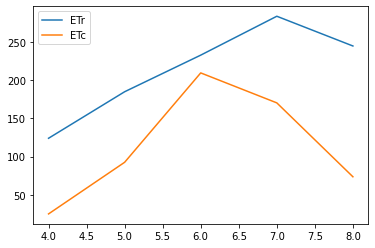

In [4]:
# Given values
Month = np.array([4, 5, 6, 7, 8])
ETr = np.array([124, 185, 233, 284, 245])
Kc = np.array([0.2, 0.5, 0.9, 0.6, 0.3])

# Total ET required is
totalETc = np.sum(Kc*ETr)
print('Total crop water requirment is %d mm per year' %totalETc)

# Make a plot
plt.plot(Month, ETr,label='ETr')
plt.plot(Month, Kc*ETr,label='ETc')
plt.legend()


## Results:
Final ETc is 570mm.

## Description:
On average, for this location, we expect a potoato crop to use **570** mm of irrigation water water in total. Thus if no rainfall occurs at this field, it will need this much water over the course of the growning season.

\pagebreak